<a href="https://colab.research.google.com/github/Ankit-tiwary-26/Stuttering-Prediction-using-Deep-Learning-/blob/main/M_and_F_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()



Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ankit2605","key":"d7d1acecfe87d19fc50d9be248de08a5"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d ikrbasak/sep-28k


Dataset URL: https://www.kaggle.com/datasets/ikrbasak/sep-28k
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
 99% 2.15G/2.17G [00:21<00:00, 145MB/s]
100% 2.17G/2.17G [00:21<00:00, 108MB/s]


In [ ]:
!unzip sep-28k.zip -d sep-28k_dataset

Streaming output truncated to the last 5000 lines.
  inflating: sep-28k_dataset/clips/stuttering-clips/clips/WomenWhoStutter_42_59.wav  
  inflating: sep-28k_dataset/clips/stuttering-clips/clips/WomenWhoStutter_42_6.wav  
  inflating: sep-28k_dataset/clips/stuttering-clips/clips/WomenWhoStutter_42_60.wav  
  inflating: sep-28k_dataset/clips/stuttering-clips/clips/WomenWhoStutter_42_61.wav  
  inflating: sep-28k_dataset/clips/stuttering-clips/clips/WomenWhoStutter_42_62.wav  
  inflating: sep-28k_dataset/clips/stuttering-clips/clips/WomenWhoStutter_42_63.wav  
  inflating: sep-28k_dataset/clips/stuttering-clips/clips/WomenWhoStutter_42_64.wav  
  inflating: sep-28k_dataset/clips/stuttering-clips/clips/WomenWhoStutter_42_65.wav  
  inflating: sep-28k_dataset/clips/stuttering-clips/clips/WomenWhoStutter_42_66.wav  
  inflating: sep-28k_dataset/clips/stuttering-clips/clips/WomenWhoStutter_42_67.wav  
  inflating: sep-28k_dataset/clips/stuttering-clips/clips/WomenWhoStutter_42_68.wav  
  in

In [ ]:
import os

for root, dirs, files in os.walk("sep-28k_dataset"):
    print(f"\n📁 Directory: {root}")
    for file in files:
        print(f" - {file}")


Streaming output truncated to the last 5000 lines.
 - HeStutters_1_115.wav
 - StrongVoices_32_75.wav
 - FluencyBank_098_95.wav
 - FluencyBank_230_112.wav
 - FluencyBank_985_28.wav
 - StutterTalk_33_171.wav
 - HeStutters_9_20.wav
 - HeStutters_6_184.wav
 - HVSA_2_185.wav
 - HeStutters_19_41.wav
 - StrongVoices_12_3.wav
 - MyStutteringLife_35_134.wav
 - StutterTalk_75_31.wav
 - WomenWhoStutter_43_13.wav
 - WomenWhoStutter_50_220.wav
 - HeStutters_8_61.wav
 - IStutterSoWhat_4_151.wav
 - StrongVoices_23_0.wav
 - MyStutteringLife_7_52.wav
 - StutterTalk_30_10.wav
 - HeStutters_15_92.wav
 - MyStutteringLife_5_12.wav
 - StutterTalk_65_9.wav
 - MyStutteringLife_12_8.wav
 - StutterTalk_57_33.wav
 - FluencyBank_109_48.wav
 - StutterTalk_43_88.wav
 - WomenWhoStutter_1_101.wav
 - MyStutteringLife_32_108.wav
 - FluencyBank_071_18.wav
 - StutterTalk_33_10.wav
 - StutteringIsCool_46_141.wav
 - HeStutters_1_212.wav
 - WomenWhoStutter_51_22.wav
 - StutteringIsCool_63_16.wav
 - HVSA_3_6.wav
 - WomenWhoS

In [ ]:
import os

for root, dirs, files in os.walk("sep-28k_dataset"):
    print(f"📁 {root}")
    for file in files[:5]:  # print only first 5 files per folder
        print(f"  📄 {file}")


📁 sep-28k_dataset
  📄 fluencybank_episodes.csv
  📄 fluencybank_labels.csv
  📄 SEP-28k_labels.csv
  📄 SEP-28k_episodes.csv
📁 sep-28k_dataset/clips
📁 sep-28k_dataset/clips/stuttering-clips
📁 sep-28k_dataset/clips/stuttering-clips/clips
  📄 StutteringIsCool_24_13.wav
  📄 StutteringIsCool_38_11.wav
  📄 StutterTalk_8_155.wav
  📄 StutterTalk_53_10.wav
  📄 WomenWhoStutter_97_130.wav


In [ ]:

import os

clip_folder = "sep-28k_dataset/clips/stuttering-clips/clips"
num_clips = len([f for f in os.listdir(clip_folder) if f.endswith(".wav")])

print(f"🎧 Total audio clips: {num_clips}")

🎧 Total audio clips: 32321


In [ ]:
import pandas as pd
import os

# Paths
csv_path = "/content/sep-28k_dataset/SEP-28k_labels.csv"
audio_folder = "/content/sep-28k_dataset/clips/stuttering-clips/clips"

# Load CSV
df = pd.read_csv(csv_path)

# Generate filename
df['filename'] = df.apply(lambda row: f"{row['Show']}_{row['EpId']}_{row['ClipId']}.wav", axis=1)

# List actual files in folder
audio_files = set(os.listdir(audio_folder))

# Check which files exist
df['exists'] = df['filename'].apply(lambda x: x in audio_files)

# Count existing files
total_files = len(df)
available_files = df['exists'].sum()

print(f"Total entries in CSV: {total_files}")
print(f"Files available in folder: {available_files}")
print(f"Missing files: {total_files - available_files}")

# See first few matched rows
print(df[df['exists']].head())


Total entries in CSV: 28177
Files available in folder: 28177
Missing files: 0
         Show  EpId  ClipId     Start      Stop  Unsure  PoorAudioQuality  \
0  HeStutters     0       0  31900320  31948320       0                 0   
1  HeStutters     0       1  31977120  32025120       0                 0   
2  HeStutters     0       2  34809760  34857760       0                 0   
3  HeStutters     0       3  35200640  35248640       0                 0   
4  HeStutters     0       4  35721920  35769920       0                 0   

   Prolongation  Block  SoundRep  WordRep  DifficultToUnderstand  \
0             0      0         0        0                      0   
1             0      0         0        0                      0   
2             0      0         0        0                      0   
3             1      0         0        0                      0   
4             0      0         0        0                      0   

   Interjection  NoStutteredWords  NaturalPause  M

In [ ]:
import pandas as pd

# Load CSV again
csv_path = "/content/sep-28k_dataset/SEP-28k_labels.csv"
df = pd.read_csv(csv_path)

# Create filename
df['filename'] = df.apply(lambda row: f"{row['Show']}_{row['EpId']}_{row['ClipId']}.wav", axis=1)

# Combine stuttering indicators
stutter_cols = ['Prolongation', 'Block', 'SoundRep', 'WordRep']
df['label'] = df[stutter_cols].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

# Check distribution of labels
print(df['label'].value_counts())  # 1 = stuttered, 0 = normal

# Show first few
df = df[['filename', 'label']].head()
print(df)

label
1    19931
0     8246
Name: count, dtype: int64
             filename  label
0  HeStutters_0_0.wav      0
1  HeStutters_0_1.wav      0
2  HeStutters_0_2.wav      0
3  HeStutters_0_3.wav      1
4  HeStutters_0_4.wav      0


In [ ]:
import pandas as pd

# Load CSV again
csv_path = "/content/sep-28k_dataset/SEP-28k_labels.csv"
df = pd.read_csv(csv_path)

# Create filename
df['filename'] = df.apply(lambda row: f"{row['Show']}_{row['EpId']}_{row['ClipId']}.wav", axis=1)

# Combine stuttering indicators
stutter_cols = ['Prolongation', 'Block', 'SoundRep', 'WordRep']
df['label'] = df[stutter_cols].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

# Check distribution of labels
print(df['label'].value_counts())  # 1 = stuttered, 0 = normal

# Show first few
df = df[['filename', 'label']].head()
print(df)

label
1    19931
0     8246
Name: count, dtype: int64
             filename  label
0  HeStutters_0_0.wav      0
1  HeStutters_0_1.wav      0
2  HeStutters_0_2.wav      0
3  HeStutters_0_3.wav      1
4  HeStutters_0_4.wav      0


In [ ]:





def assign_gender(filename):
    if filename.startswith('HeStutters') or filename.startswith('StutterTalk') :
        return 'male'
    elif filename.startswith('WomenWhoStutter'):
        return 'female'
    else:
        return 'mixed'

# Re-load the original data to ensure we start with the correct filenames
csv_path = "/content/sep-28k_dataset/SEP-28k_labels.csv"
df = pd.read_csv(csv_path)

# Generate filename without prefixes
df['filename'] = df.apply(lambda row: f"{row['Show']}_{row['EpId']}_{row['ClipId']}.wav", axis=1)

# Assign gender based on the cleaned filename
df['gender'] = df['filename'].apply(assign_gender)

# Combine stuttering indicators and create 'label' column
stutter_cols = ['Prolongation', 'Block', 'SoundRep', 'WordRep']
df['label'] = df[stutter_cols].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)


# Display the updated DataFrame with the new 'gender' column
display(df.head())

,Show,EpId,ClipId,Start,Stop,Unsure,PoorAudioQuality,Prolongation,Block,SoundRep,WordRep,DifficultToUnderstand,Interjection,NoStutteredWords,NaturalPause,Music,NoSpeech,filename,gender,label
0,HeStutters,0,0,31900320,31948320,0,0,0,0,0,0,0,0,3,1,0,0,HeStutters_0_0.wav,male,0
1,HeStutters,0,1,31977120,32025120,0,0,0,0,0,0,0,0,3,1,0,0,HeStutters_0_1.wav,male,0
2,HeStutters,0,2,34809760,34857760,0,0,0,0,0,0,0,0,3,0,0,0,HeStutters_0_2.wav,male,0
3,HeStutters,0,3,35200640,35248640,0,0,1,0,0,0,0,0,2,0,0,0,HeStutters_0_3.wav,male,1
4,HeStutters,0,4,35721920,35769920,0,0,0,0,0,0,0,0,3,0,0,0,HeStutters_0_4.wav,male,0


In [ ]:
# Get the count of each gender
gender_counts = df['gender'].value_counts()

# Display the counts
display(gender_counts)

,count
gender,
mixed,10266
female,9163
male,8748


In [ ]:
mixed_df = df[df['gender'] == 'mixed'].copy()
male_df = df[df['gender'] == 'male'].copy()
female_df = df[df['gender'] == 'female'].copy()

print(f"Number of mixed gender clips: {mixed_df.shape[0]}")
print(f"Number of male gender clips: {male_df.shape[0]}")
print(f"Number of female gender clips: {female_df.shape[0]}")

Number of mixed gender clips: 10266
Number of male gender clips: 8748
Number of female gender clips: 9163


In [ ]:
# Assuming your dataframe is `df` and you already created 'label' column
# where 0 = Normal, 1 = Stuttered (or extended severity labels 0-3)

# Identify gender based on 'Show' column
df['gender'] = 'Mixed'  # default
df.loc[df['Show'].str.contains("HeStutters|StutterTalk", case=False), 'gender'] = 'Male'
df.loc[df['Show'].str.contains("WomenWhoStutter", case=False), 'gender'] = 'Female'

# Filter only Normal voices
normal_df = df[df['label'] == 0]

# Count normal voices per gender
normal_counts = normal_df['gender'].value_counts()

print("Normal voice counts per gender:")
print(normal_counts)


Normal voice counts per gender:
gender
Mixed     3363
Female    2444
Male      2439
Name: count, dtype: int64


In [ ]:
missing_files = []
for fname in mixed_df['filename']:
    if not os.path.exists(os.path.join(audio_folder, fname)):
        missing_files.append(fname)

print(f"Missing files: {len(missing_files)}")

Missing files: 0


In [ ]:
import torchaudio.transforms as T
mel_transform = T.MelSpectrogram(sample_rate=16000, n_mels=64)
db_transform = T.AmplitudeToDB()

def feature_transform(waveform):
    return db_transform(mel_transform(waveform))

In [ ]:
import os
import pandas as pd
import torch
import torchaudio
import torchaudio.transforms as T
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
from sklearn.metrics import classification_report

In [ ]:
class AudioDataset(Dataset):
    def __init__(self, dataframe, audio_dir, transform=None):
        self.dataframe = dataframe
        self.audio_dir = audio_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        while True:
            audio_path = os.path.join(self.audio_dir, self.dataframe.iloc[idx]['filename'])
            try:
                waveform, sr = torchaudio.load(audio_path)
                label = self.dataframe.iloc[idx]['label']

                if self.transform:
                    waveform = self.transform(waveform)

                return waveform, label
            except (FileNotFoundError, RuntimeError):
                idx = (idx + 1) % len(self.dataframe)

In [ ]:
def pad_collate(batch):
    # batch = list of tuples (feature, label)
    features = [item[0] for item in batch]
    labels = torch.tensor([item[1] for item in batch])

    # Find max time length in batch
    max_len = max(f.shape[-1] for f in features)

    # Pad all features on last dim (time) to max_len
    padded_features = []
    for f in features:
        pad_len = max_len - f.shape[-1]
        # Pad (left, right) = (0, pad_len) on last dim
        padded = torch.nn.functional.pad(f, (0, pad_len))
        padded_features.append(padded)

    # Stack padded tensors
    features_tensor = torch.stack(padded_features)
    return features_tensor, labels


In [ ]:
batch_size = 32

mixed_dataset = AudioDataset(mixed_df, audio_folder, feature_transform)
male_dataset = AudioDataset(male_df, audio_folder, feature_transform)
female_dataset = AudioDataset(female_df, audio_folder, feature_transform)

mixed_loader = DataLoader(mixed_dataset, batch_size=batch_size, shuffle=True, collate_fn=pad_collate)
male_loader = DataLoader(male_dataset, batch_size=batch_size, shuffle=False, collate_fn=pad_collate)
female_loader = DataLoader(female_dataset, batch_size=batch_size, shuffle=False, collate_fn=pad_collate)

In [ ]:
class CNNLSTM(nn.Module):
    def __init__(self, num_classes=2):
        super(CNNLSTM, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.lstm = nn.LSTM(input_size=64, hidden_size=128, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(128*2, num_classes)

    def forward(self, x):
     x = self.cnn(x)            # [batch, 64, mel/4, time/4]
     x = x.mean(dim=2)          # average mel dimension → [batch, 64, time/4]
     x = x.permute(0, 2, 1)     # → [batch, time/4, 64]
     out, _ = self.lstm(x)
     out = self.fc(out[:, -1, :])  # last time step
     return out


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNLSTM(num_classes=2).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 5
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for features, labels in mixed_loader:
        features, labels = features.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}] Loss: {total_loss/len(mixed_loader):.4f}")


Epoch [1/5] Loss: 0.6334
Epoch [2/5] Loss: 0.6322
Epoch [3/5] Loss: 0.6320
Epoch [4/5] Loss: 0.6326
Epoch [5/5] Loss: 0.6316
Epoch [5/5] Loss: 0.6316


In [ ]:
def evaluate(model, dataloader, name):
    model.eval()
    preds, targets = [], []
    with torch.no_grad():
        for features, labels in dataloader:
            features, labels = features.to(device), labels.to(device)
            outputs = model(features)
            predictions = torch.argmax(outputs, dim=1)
            preds.extend(predictions.cpu().numpy())
            targets.extend(labels.cpu().numpy())

    print(f"\n{name} Dataset Evaluation:")
    print(classification_report(targets, preds, target_names=["Normal", "Stuttered"]))

# Evaluate separately
evaluate(model, male_loader, "Male")
evaluate(model, female_loader, "Female")


Male Dataset Evaluation:
              precision    recall  f1-score   support

      Normal       1.00      0.00      0.00      2429
   Stuttered       0.72      1.00      0.84      6319

    accuracy                           0.72      8748
   macro avg       0.86      0.50      0.42      8748
weighted avg       0.80      0.72      0.61      8748


Female Dataset Evaluation:
              precision    recall  f1-score   support

      Normal       1.00      0.00      0.01      2428
   Stuttered       0.74      1.00      0.85      6735

    accuracy                           0.74      9163
   macro avg       0.87      0.50      0.43      9163
weighted avg       0.81      0.74      0.63      9163



In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.unique(mixed_df['label'])
weights = compute_class_weight(class_weight='balanced', classes=classes, y=mixed_df['label'])
weights = torch.tensor(weights, dtype=torch.float).to(device)

criterion = nn.CrossEntropyLoss(weight=weights)


In [ ]:
evaluate(model, mixed_loader, "Mixed")


Mixed Dataset Evaluation:
              precision    recall  f1-score   support

      Normal       0.56      0.00      0.00      3358
   Stuttered       0.67      1.00      0.80      6908

    accuracy                           0.67     10266
   macro avg       0.61      0.50      0.40     10266
weighted avg       0.63      0.67      0.54     10266



In [ ]:
import os
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4954 - loss: 0.6973 - val_accuracy: 0.5100 - val_loss: 0.6957
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4848 - loss: 0.6986 - val_accuracy: 0.5000 - val_loss: 0.6960
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5082 - loss: 0.6939 - val_accuracy: 0.5150 - val_loss: 0.6962
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5249 - loss: 0.6941 - val_accuracy: 0.5050 - val_loss: 0.6963
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5111 - loss: 0.6919 - val_accuracy: 0.5150 - val_loss: 0.6986
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5212 - loss: 0.6884 - val_accuracy: 0.4950 - val_loss: 0.6972
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5577 - loss: 0.6825 - val_accuracy: 0.5000 - val_loss: 0.6977
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5687 - loss: 0.6800 - val_accuracy: 0.4950 - val_loss

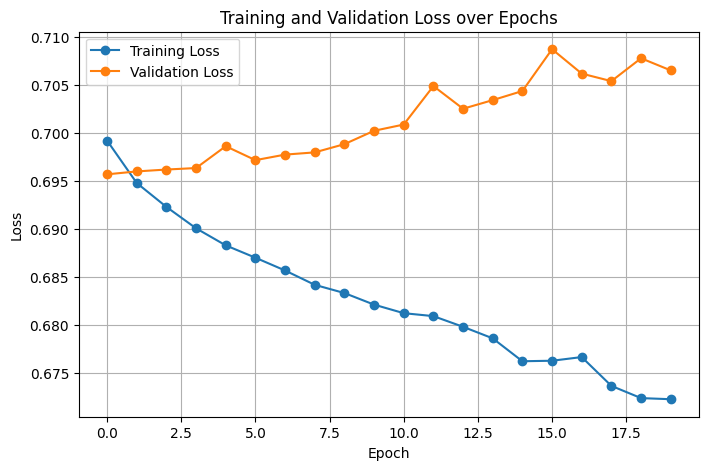

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Example dummy data
import numpy as np
X_train = np.random.rand(1000, 20)
y_train = np.random.randint(2, size=1000)
X_val = np.random.rand(200, 20)
y_val = np.random.randint(2, size=200)

# Define a simple model
model = Sequential([
    Dense(64, activation='relu', input_shape=(20,)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and get the history object
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32
)

# Plot training & validation loss values
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
def extract_features(df, audio_folder, fixed_len=300, n_mels=64, sr=16000):
    features, labels = [], []
    for idx in range(len(df)):
        file_path = os.path.join(audio_folder, df.iloc[idx]['filename'])
        try:
            # Load audio
            y, _ = librosa.load(file_path, sr=sr)  # auto-converts MP3/AAC/WAV
        except Exception as e:
            print(f"Skipping {file_path}: {e}")
            continue

        # Mel spectrogram
        mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
        mel_db = librosa.power_to_db(mel, ref=np.max)

        # Pad/Truncate to fixed length
        if mel_db.shape[1] > fixed_len:
            mel_db = mel_db[:, :fixed_len]
        else:
            pad_width = fixed_len - mel_db.shape[1]
            mel_db = np.pad(mel_db, ((0,0),(0,pad_width)), mode='constant')

        # Flatten to 1D vector
        features.append(mel_db.flatten())
        labels.append(df.iloc[idx]['label'])

    return np.array(features), np.array(labels)


In [ ]:
X_train, y_train = extract_features(mixed_df, audio_folder)
X_test_male, y_test_male = extract_features(male_df, audio_folder)
X_test_female, y_test_female = extract_features(female_df, audio_folder)

# One-hot encode labels for Keras
y_train = to_categorical(y_train, num_classes=2)
y_test_male = to_categorical(y_test_male, num_classes=2)
y_test_female = to_categorical(y_test_female, num_classes=2)

print("Train shape:", X_train.shape)
print("Male test shape:", X_test_male.shape)
print("Female test shape:", X_test_female.shape)


/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(


Train shape: (10266, 19200)
Male test shape: (8748, 19200)
Female test shape: (9163, 19200)


In [ ]:
# Simple Dense NN
input_shape = X_train.shape[1:]

model = Sequential([
    Dense(128, activation='relu', input_shape=input_shape),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.6118 - loss: 38.0410 - val_accuracy: 0.6573 - val_loss: 0.6587
Epoch 2/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.6735 - loss: 0.7615 - val_accuracy: 0.6573 - val_loss: 0.6433
Epoch 3/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.6756 - loss: 0.9043 - val_accuracy: 0.6573 - val_loss: 0.6434
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.6667 - loss: 0.6392 - val_accuracy: 0.6573 - val_loss: 0.6434
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.6738 - loss: 0.6331 - val_accuracy: 0.6573 - val_loss: 0.6432
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.6667 - loss: 0.6369 - val_accuracy: 0.6573 - val_loss: 0.6436
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.6741 - loss: 0.6332 - val_accuracy: 0.6573 - val_loss: 0.6433
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.6789 - loss: 0.6284 - val_

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute weights
classes = np.unique(np.argmax(y_train, axis=1))  # [0,1]
weights = compute_class_weight('balanced', classes=classes, y=np.argmax(y_train, axis=1))
class_weights = dict(zip(classes, weights))

# Use in training
model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1,
    class_weight=class_weights
)


Epoch 1/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.6630 - loss: 0.7410 - val_accuracy: 0.6573 - val_loss: 0.6682
Epoch 2/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - accuracy: 0.6758 - loss: 0.6935 - val_accuracy: 0.6573 - val_loss: 0.6832
Epoch 3/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.6782 - loss: 0.6900 - val_accuracy: 0.6573 - val_loss: 0.6888
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.6780 - loss: 0.6900 - val_accuracy: 0.6573 - val_loss: 0.6917
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.6019 - loss: 0.6960 - val_accuracy: 0.6573 - val_loss: 0.6910
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.6503 - loss: 0.6923 - val_accuracy: 0.6573 - val_loss: 0.6922
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.6555 - loss: 0.6934 - val_accuracy: 0.6573 - val_loss: 0.6914
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.6745 - loss: 0.6920 - val_ac

274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

Male Dataset Evaluation Report:
              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00      2439
   Stuttered       0.72      1.00      0.84      6309

    accuracy                           0.72      8748
   macro avg       0.36      0.50      0.42      8748
weighted avg       0.52      0.72      0.60      8748



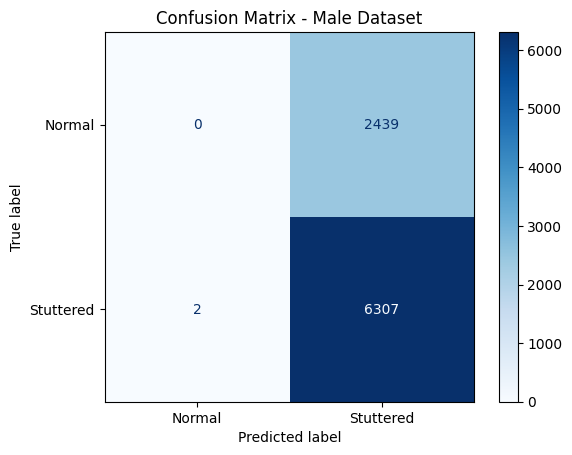

287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

Female Dataset Evaluation Report:
              precision    recall  f1-score   support

      Normal       0.70      0.00      0.01      2444
   Stuttered       0.73      1.00      0.85      6719

    accuracy                           0.73      9163
   macro avg       0.72      0.50      0.43      9163
weighted avg       0.72      0.73      0.62      9163



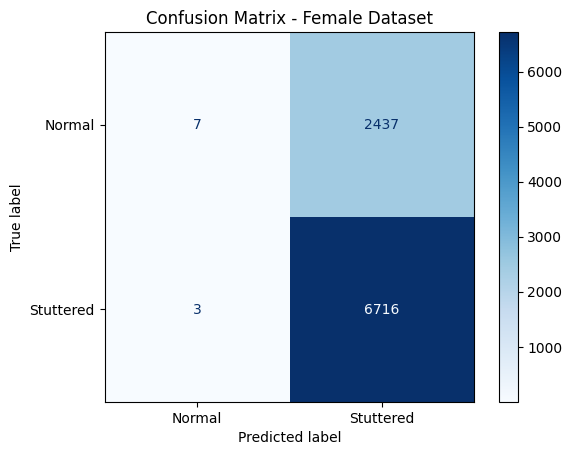

In [ ]:
def evaluate_model(X_test, y_test, name):
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_test, axis=1)

    print(f"\n{name} Evaluation Report:")
    print(classification_report(y_true, y_pred, target_names=["Normal", "Stuttered"]))

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Stuttered"])
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

# Evaluate male and female separately
evaluate_model(X_test_male, y_test_male, "Male Dataset")
evaluate_model(X_test_female, y_test_female, "Female Dataset")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe has columns: 'gender' and 'label'
# gender: 'male', 'female', 'mixed'
# label: 0 = Normal, 1 = Stuttered

# Count combinations of gender and label
counts = df.groupby(['gender', 'label']).size().unstack(fill_value=0)

# Rename columns for clarity
counts.columns = ['Normal', 'Stuttered']

# Plot grouped bar chart
counts.plot(kind='bar', figsize=(8, 6), color=['#4CAF50', '#F44336'])

plt.title('Gender-wise Distribution of Normal vs Stuttered Voices')
plt.xlabel('Gender')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.legend(title='Voice Type')
plt.tight_layout()
plt.show()


ValueError: Length mismatch: Expected axis has 4 elements, new values have 2 elements

In [ ]:
# Split mixed data into train (80%) and test (20%)
from sklearn.model_selection import train_test_split

train_df, mixed_test_df = train_test_split(mixed_df, test_size=0.2, random_state=42) # Removed stratify

# Extract features
X_train, y_train = extract_features(train_df, audio_folder)
X_test_mixed, y_test_mixed = extract_features(mixed_test_df, audio_folder)

# One-hot encode
y_train = to_categorical(y_train, num_classes=4)
y_test_mixed = to_categorical(y_test_mixed, num_classes=4)

/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

Mixed Dataset Evaluation Report:
              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00       673
   Stuttered       0.67      1.00      0.80      1381

    accuracy                           0.67      2054
   macro avg       0.34      0.50      0.40      2054
weighted avg       0.45      0.67      0.54      2054



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


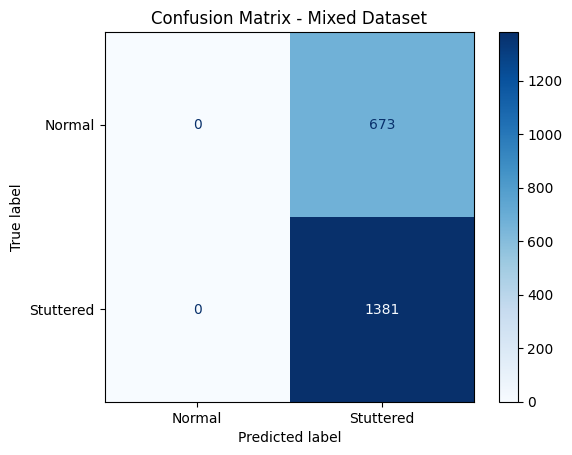

274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

Male Dataset Evaluation Report:
              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00      2439
   Stuttered       0.72      1.00      0.84      6309

    accuracy                           0.72      8748
   macro avg       0.36      0.50      0.42      8748
weighted avg       0.52      0.72      0.60      8748



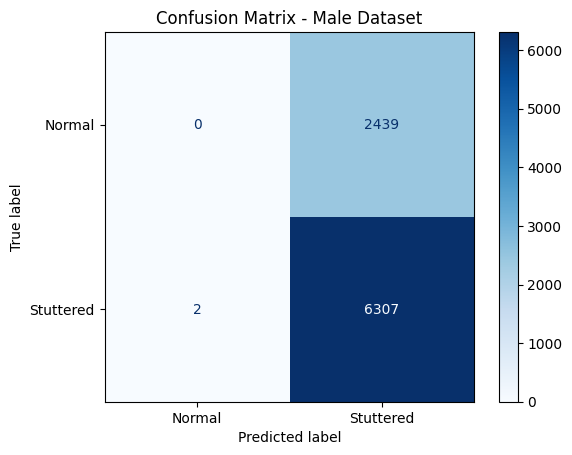

287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

Female Dataset Evaluation Report:
              precision    recall  f1-score   support

      Normal       0.70      0.00      0.01      2444
   Stuttered       0.73      1.00      0.85      6719

    accuracy                           0.73      9163
   macro avg       0.72      0.50      0.43      9163
weighted avg       0.72      0.73      0.62      9163



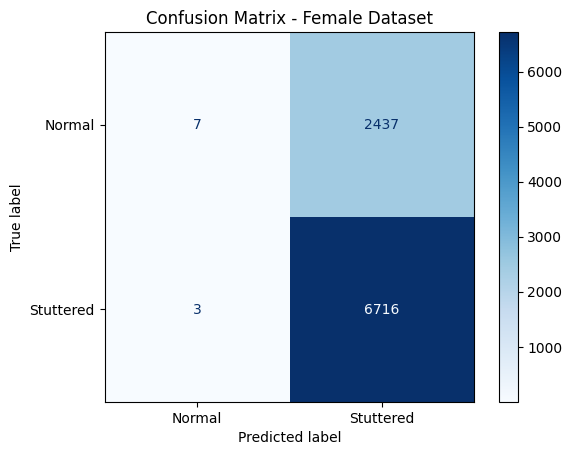

In [ ]:
evaluate_model(X_test_mixed, y_test_mixed, "Mixed Dataset")
evaluate_model(X_test_male, y_test_male, "Male Dataset")
evaluate_model(X_test_female, y_test_female, "Female Dataset")

In [ ]:
# Sum stuttering features
df['stutter_score'] = df[['Prolongation', 'Block', 'SoundRep', 'WordRep']].sum(axis=1)

# Map to 4 classes
def severity_label(score):
    if score == 0:
        return 0  # Normal
    elif score == 1:
        return 1  # Mild
    elif score == 2:
        return 2  # Moderate
    else:
        return 3  # Severe

df['label'] = df['stutter_score'].apply(severity_label)


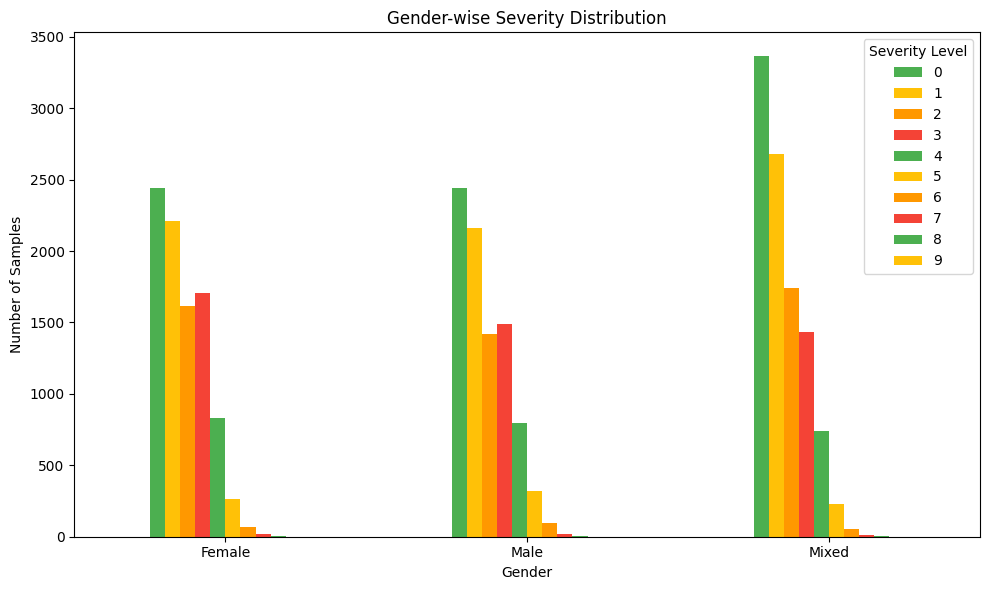

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe has columns: 'gender' and 'severity'
# severity values: 0 = Normal, 1 = Mild, 2 = Moderate, 3 = Severe

# Count combinations of gender and severity
counts = df.groupby(['gender', 'stutter_score']).size().unstack(fill_value=0)

# Rename columns to severity labels
columns = ['Normal', 'Mild', 'Moderate', 'Severe']

# Plot grouped bar chart
counts.plot(kind='bar', figsize=(10, 6),
            color=['#4CAF50', '#FFC107', '#FF9800', '#F44336'])

plt.title('Gender-wise Severity Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.legend(title='Severity Level')
plt.tight_layout()
plt.show()


In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=input_shape),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')   # 4 classes now
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

NameError: name 'input_shape' is not defined

Overall Severity Prediction Accuracy: 75.00%

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         2
        Mild       1.00      1.00      1.00         2
    Moderate       0.50      0.50      0.50         2
      Severe       0.50      0.50      0.50         2

    accuracy                           0.75         8
   macro avg       0.75      0.75      0.75         8
weighted avg       0.75      0.75      0.75         8



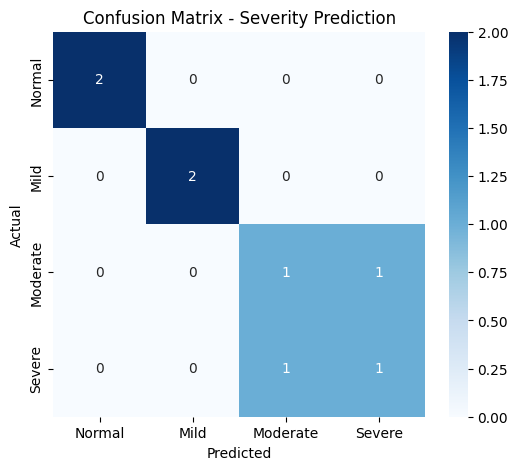

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example: true labels and predicted labels
# Replace these with your model outputs
y_true = np.array([0, 1, 2, 3, 1, 2, 0, 3])   # 0=Normal, 1=Mild, 2=Moderate, 3=Severe
y_pred = np.array([0, 1, 2, 2, 1, 3, 0, 3])   # predictions

# Calculate Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Overall Severity Prediction Accuracy: {accuracy * 100:.2f}%")

# Classification Report (Precision, Recall, F1 for each severity level)
target_names = ['Normal', 'Mild', 'Moderate', 'Severe']
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=target_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.title("Confusion Matrix - Severity Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# Get predictions for test data
y_pred_probs = model.predict(X_test)   # probabilities for each class
y_pred = np.argmax(y_pred_probs, axis=1)  # convert to class indices (0-3)

# Actual labels
y_true = np.argmax(y_test, axis=1)  # if one-hot encoded
# If y_test already has class indices, use directly: y_true = y_test


NameError: name 'model' is not defined

In [ ]:
def predict_audio(file_path):
    # Extract features from single file
    y, _ = librosa.load(file_path, sr=16000)
    mel = librosa.feature.melspectrogram(y=y, sr=16000, n_mels=64)
    mel_db = librosa.power_to_db(mel, ref=np.max)

    # Pad/truncate
    fixed_len = 300
    if mel_db.shape[1] > fixed_len:
        mel_db = mel_db[:, :fixed_len]
    else:
        pad_width = fixed_len - mel_db.shape[1]
        mel_db = np.pad(mel_db, ((0,0),(0,pad_width)), mode='constant')

    feature = mel_db.flatten().reshape(1, -1)  # 1 sample

    # Predict
    pred = model.predict(feature)
    classes = ["Normal", "Mild Stuttering", "Moderate Stuttering", "Severe Stuttering"]
    return classes[np.argmax(pred)]


In [ ]:
print(predict_audio("/content/sep-28k_dataset/clips/stuttering-clips/clips/FluencyBank_071_33.wav"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
Severe Stuttering


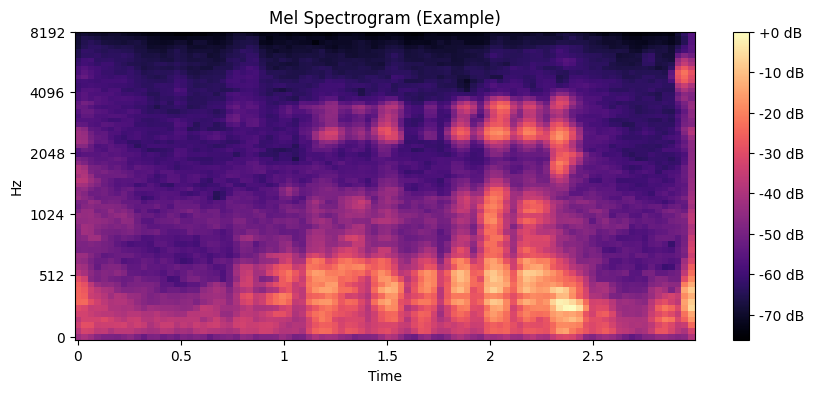

In [ ]:
import librosa.display
import matplotlib.pyplot as plt

y, sr = librosa.load("/content/sep-28k_dataset/clips/stuttering-clips/clips/FluencyBank_071_33.wav", sr=16000)
mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=64)
mel_db = librosa.power_to_db(mel, ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel Spectrogram (Example)")
plt.show()


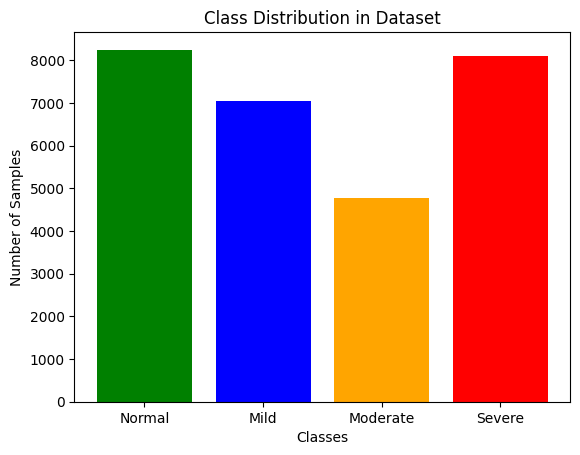

In [ ]:
import matplotlib.pyplot as plt

# Example: counts per class
labels = ["Normal", "Mild", "Moderate", "Severe"]
counts = df['label'].value_counts().sort_index()  # assuming 0=Normal,1=Mild,...

plt.bar(labels, counts, color=['green', 'blue', 'orange', 'red'])
plt.title("Class Distribution in Dataset")
plt.xlabel("Classes")
plt.ylabel("Number of Samples")
plt.show()


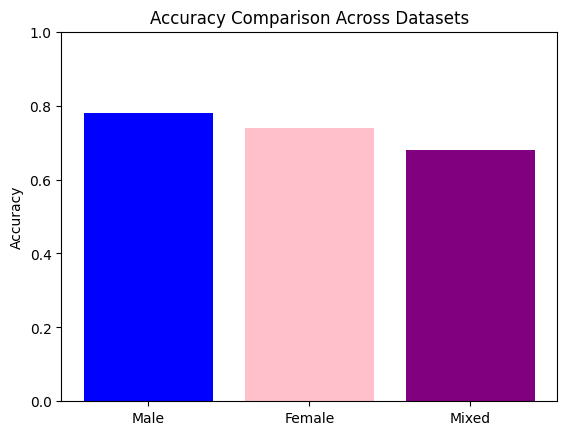

In [ ]:
datasets = ['Male', 'Female', 'Mixed']
accuracies = [0.78, 0.74, 0.68]  # example values

plt.bar(datasets, accuracies, color=['blue', 'pink', 'purple'])
plt.title("Accuracy Comparison Across Datasets")
plt.ylabel("Accuracy")
plt.ylim(0,1)  # 0 to 100%
plt.show()


In [ ]:
print(mixed_df['label'].value_counts())

label
1    6903
0    3363
Name: count, dtype: int64


In [ ]:
import numpy as np
import librosa

FIXED_LEN = 300
N_MELS = 64
SR = 16000

def preprocess_audio(file_path):
    # Load audio file
    y, _ = librosa.load(file_path, sr=SR)

    # Extract mel spectrogram
    mel = librosa.feature.melspectrogram(y=y, sr=SR, n_mels=N_MELS)
    mel_db = librosa.power_to_db(mel, ref=np.max)

    # Pad or truncate to fixed length
    if mel_db.shape[1] > FIXED_LEN:
        mel_db = mel_db[:, :FIXED_LEN]
    else:
        pad_width = FIXED_LEN - mel_db.shape[1]
        mel_db = np.pad(mel_db, ((0,0),(0,pad_width)), mode='constant')

    # Flatten to 1D vector
    return mel_db.flatten().reshape(1, -1)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Classes
CLASSES = ["Normal", "Mild Stuttering", "Moderate Stuttering", "Severe Stuttering"]

def predict_and_plot(file_path, model):
    # Preprocess same as training
    features = preprocess_audio(file_path)

    # Get prediction probabilities
    preds = model.predict(features)[0]  # shape (4,)

    # Plot as bar chart
    plt.bar(CLASSES, preds, color=['green', 'blue', 'orange', 'red'])
    plt.title("Predicted Stuttering Severity")
    plt.ylabel("Probability")
    plt.ylim(0, 1)
    plt.show()

    # Print most likely class
    print("Predicted Severity:", CLASSES[np.argmax(preds)])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


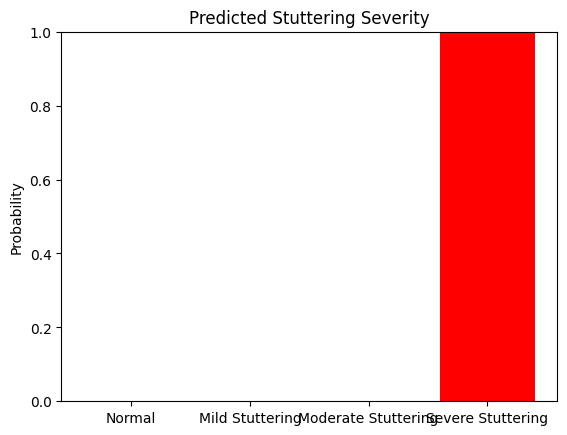

Predicted Severity: Severe Stuttering


In [ ]:
result = predict_and_plot("/content/sep-28k_dataset/clips/stuttering-clips/clips/FluencyBank_010_11.wav", model)
